# 3. Численное интегрирование

Отлично — задача классическая и идеально подходит для «математического аппарата + эксперимент». Ниже — компактный, но полноценный набор теории, оценок погрешности и практических приёмов, которые позволят вам как аналитически, так и численно исследовать зависимость ошибки от шага сетки $h$.

# 1. Разбиение отрезка и обозначения

Пусть $[a,b]$ — отрезок интегрирования, $n$ — число равных подынтервалов,

$$
h=\frac{b-a}{n},\qquad x_i=a+i h,\; i=0,\dots,n.
$$

Обозначим точное значение интеграла $I=\int_a^b f(x)\,dx$. Пусть $I_h$ — приближённое значение, полученное с шагом $h$.

# 2. Формулы квадратур (местные и составные)

Ниже — одна подынтервальная (локальная) формула и соответствующая составная (composite) запись.

**Прямоугольники.** Есть три варианта:

* левый прямоугольник (left): на подынтервале $[x_{i},x_{i+1}]$ приближение $f(x_i)h$.
  Составная: $R^{(L)}_n=h\sum_{i=0}^{n-1} f(x_i)$.
  Порядок аппроксимации: $O(h)$ (первый порядок).
* правый прямоугольник (right): $R^{(R)}_n=h\sum_{i=1}^{n} f(x_i)$. Порядок $O(h)$.
* средний прямоугольник (midpoint): на $[x_i,x_{i+1}]$ берём значение в середине $\tilde x_i=(x_i+x_{i+1})/2$:
  $M_n=h\sum_{i=0}^{n-1} f(\tilde x_i)$. Порядок $O(h^2)$ (второй порядок).

**Трапеции.** Локально: $\dfrac{h}{2}\big(f(x_i)+f(x_{i+1})\big)$.
Составная (composite trapezoid):

$$
T_n=\frac{h}{2}\big(f(a)+f(b)\big)+h\sum_{i=1}^{n-1} f(x_i).
$$

Порядок: $O(h^2)$.

**Правило Симпсона.** Применяется на паре соседних подынтервалов (требуется чётное $n$). На $[x_{2k},x_{2k+2}]$:

$$
S_{\text{лок}}=\frac{h}{3}\big(f(x_{2k})+4f(x_{2k+1})+f(x_{2k+2})\big).
$$

Составная:

$$
S_n=\frac{h}{3}\big(f(a)+f(b)+4\sum_{k=0}^{n/2-1} f(x_{2k+1})+2\sum_{k=1}^{n/2-1} f(x_{2k})\big).
$$

Порядок: $O(h^4)$.

# 3. Оценки погрешности (асимптотические и интервальные)

Пусть $f$ достаточно гладкая на $[a,b]$. Обозначим $M_2=\max_{x\in[a,b]}|f''(x)|$, $M_4=\max_{x\in[a,b]}|f^{(4)}(x)|$.

* Для **составной трапеции** существует $\xi\in(a,b)$ такое, что

$$
E_T=I-T_n=-\frac{(b-a)}{12}h^2 f''(\xi).
$$

Из этого следует грубая верхняя оценка

$$
|E_T|\le \frac{(b-a)}{12}h^2 M_2.
$$

* Для **составного среднего прямоугольника (midpoint)**

$$
E_M=I-M_n=-\frac{(b-a)}{24}h^2 f''(\xi),
\qquad |E_M|\le \frac{(b-a)}{24}h^2 M_2.
$$

(Здесь видно, что по константе midpoint в два раза лучше трапеции.)

* Для **правила Симпсона (составного)**:

$$
E_S=I-S_n=-\frac{(b-a)}{180}h^4 f^{(4)}(\xi),
\qquad |E_S|\le \frac{(b-a)}{180}h^4 M_4.
$$

* Для **левых/правых прямоугольников** (если использовать их составные версии) ошибка имеет порядок $O(h)$: обычно

$$
E_{L}=I-R^{(L)}_n = -\frac{b-a}{2} h f'(\eta)
$$

(точная форма аналогична, главное — порядок $h$).

Замечание: записи с $\xi$ — теоремы о среднем значении ошибки; для строгой верхней оценки используйте максимумы производных.

# 4. Вывод порядка с помощью ряда Тейлора (кратко)

Пусть локально на $[x_i,x_{i+1}]$ разложим $f$ в ряд Тейлора вокруг центра или конца: подставляем в формулу квадратуры и интегрируем члены ряда — старший невырожденный член даёт главную степень зависимости от $h$. Это даёт показанные выше порядки и числовые коэффициенты.

# 5. Практический (численный) эксперимент: как исследовать зависимость ошибки от шага

1. Выберите тестовые функции $f$ с известными интегралами $I$. Рекомендуемые примеры:

   * полиномы: $f(x)=1,x,x^2,x^3,x^4$ (проверка порядков; Симпсон даёт точный результат до степени 3 включительно),
   * гладкие функции: $f(x)=\sin x,\; e^x,\; \cos x$,
   * функция с «меньшей гладкостью»: $f(x)=|x|$ на отрезке содержащем 0 (будет видно ухудшение порядка),
   * сильно колеблющие: $f(x)=\sin(100x)$.

2. Для каждого $n$ (например $n=10,20,40,80,160,\dots$) вычислите приближения $I_h$ (прямой/средний/трапеция/Симпсон).

3. Для каждого $h$ вычислите абсолютную ошибку

$$
E(h)=|I-I_h|.
$$

4. Постройте график $\log E(h)$ против $\log h$. На больших областях гладкости точки должны лежать на прямой; наклон этой прямой — эмпирический порядок сходимости $p$: если $E(h)\approx C h^p$, то наклон примерно $p$.

5. Альтернатива — вычислить эмпирически порядок $p$ по трем последовательным значениям $h,h/2,h/4$:

$$
p\approx \frac{\log\big(E(h)/E(h/2)\big)}{\log 2}.
$$

Или более устойчиво:

$$
p\approx\log_2\frac{I_h-I_{2h}}{I_{2h}-I_{4h}}.
$$

(В последней формуле предполагается, что погрешности доминирует член $C h^p$.)

6. Используйте **Ричардсон-экстраполяцию** для улучшения точности и проверки порядка. Если метод даёт порядок 2 (например трапеция), то комбинирование

$$
I_{\text{rich}}=\frac{4T_{h/2}-T_h}{3}
$$

даёт увеличение порядка (получаем O(h^4) остаток). Для правила Симпсона (p=4) экстраполяция аналогична, но коэффициенты другие.

# 6. Рекомендованный план отчёта / лабораторной работы

1. Краткая теория: перечислить методы, их составные формулы, и формулы погрешности с указанием регулярности $f$.
2. Вывод погрешностей (короткое изложение через Тейлор либо через интегральную формулу остатка).
3. Эксперимент:

   * таблицы значений $h, I_h, E(h)$ для каждой формулы и каждой тестовой функции,
   * графики $\log E$ против $\log h$,
   * табличное вычисление эмпирического порядка $p$,
   * демонстрация Ричардсона (один-два примера).
4. Обсуждение: когда порядок падает (меньшая гладкость), сравнение констант (midpoint vs trapezoid), эффективность Simpson при гладких функциях.
5. Выводы: какой метод эффективнее при каких условиях, как выбирать $n$ для заданной точности.

# 7. Полезные замечания и тонкости

* Симпсон требует чётного $n$.
* При очень маленьком $h$ компьютерная арифметика (округление) может стать заметной — наблюдайте отклонения от асимптотики.
* Для функций с особенностями (разрывы, когезивность в производных) порядок снижается до минимально допустимого (иногда до 1).
* Для оценки констант $M_2,M_4$ можно использовать аналитические выражения (если известны) либо численные приближения (максимум на сетке).

# 8. Примеры формул погрешности (итоговая сводка)

$$
\begin{aligned}
&|E_{L}|=O(h),\\
&|E_{R}|=O(h),\\
&|E_{M}|\le \frac{(b-a)}{24}h^2 M_2,\quad (\,E_M= -\tfrac{(b-a)}{24}h^2 f''(\xi)\,),\\
&|E_{T}|\le \frac{(b-a)}{12}h^2 M_2,\quad (\,E_T= -\tfrac{(b-a)}{12}h^2 f''(\xi)\,),\\
&|E_{S}|\le \frac{(b-a)}{180}h^4 M_4,\quad (\,E_S= -\tfrac{(b-a)}{180}h^4 f^{(4)}(\xi)\,).
\end{aligned}
$$

---

Если хочешь, могу:

* подготовить готовую программу (например на Python) для экспериментов: вычисления $I_h$ для всех методов, таблицы, лог-лог графики и автоматический вывод эмпирического порядка $p$;
* привести конкретный пример вычислений для одной функции (с кодом и графиками).

Напиши, что предпочитаешь: аналитическое объяснение — достаточно или хотите и код/графики.


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from numbers import Number
from scipy.integrate import quad
from tqdm import tqdm

In [62]:
a, b = 0, 5

def f(x):
    return np.tanh(x)

In [63]:
def rectangle(grid: np.ndarray, f_grid: np.ndarray) -> Number:
    h = grid[1] - grid[0]
    return (h * f_grid[:-1]).sum()

def trapezoid(grid: np.ndarray, f_grid: np.ndarray) -> Number:
    h = grid[1] - grid[0]
    return h/2 * (f_grid[0] + f_grid[-1]) + h * f_grid[1:-1].sum()

def simpson(grid: np.ndarray, f_grid: np.ndarray) -> Number:
    h = grid[1] - grid[0]
    return h/3 * (f_grid[0] + f_grid[-1] + 4 * f_grid[1:-1:2].sum() + 2 * f_grid[2:-1:2].sum())

100%|██████████| 48/48 [00:00<00:00, 39701.56it/s]

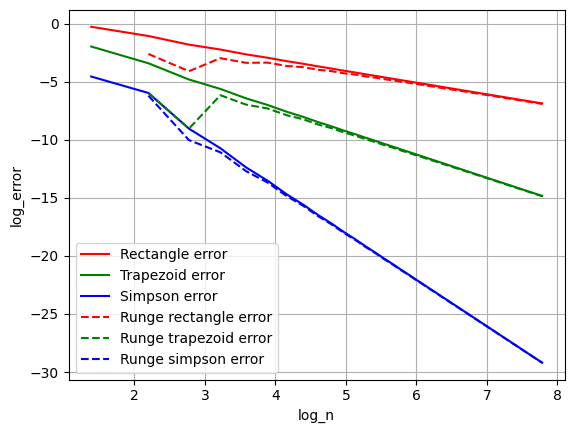

In [64]:
n_history = []
rectangle_intedgal_history = []
trapezoid_intedgal_history = []
simpson_intedgal_history = []
runge_rectangle_intedgal_history = []
runge_trapezoid_intedgal_history = []
runge_simpson_intedgal_history = []

def runge(Ih, Ih2, p):
    return (Ih - Ih2) / (2 ** p - 1)

for p in tqdm(range(2, 50)):

    n = p ** 2
    grid = np.linspace(a, b, n if n % 2 == 1 else n + 1, dtype=float)
    f_grid = f(grid)

    n_history.append(n)
    rectangle_solution = rectangle(grid, f_grid)
    trapezoid_solution = trapezoid(grid, f_grid)
    simpson_solution = simpson(grid, f_grid)
    rectangle_intedgal_history.append(rectangle_solution)
    trapezoid_intedgal_history.append(trapezoid_solution)
    simpson_intedgal_history.append(simpson_solution)
    if len(rectangle_intedgal_history) > 1:
        runge_rectangle_intedgal_history.append(rectangle_solution + runge(rectangle_intedgal_history[-1], rectangle_intedgal_history[-2], 1))
        runge_trapezoid_intedgal_history.append(trapezoid_solution + runge(trapezoid_intedgal_history[-1], trapezoid_intedgal_history[-2], 2))
        runge_simpson_intedgal_history.append(simpson_solution + runge(simpson_intedgal_history[-1], simpson_intedgal_history[-2], 4))

n_history = np.array(n_history)
rectangle_intedgal_history = np.array(rectangle_intedgal_history)
trapezoid_intedgal_history = np.array(trapezoid_intedgal_history)
simpson_intedgal_history = np.array(simpson_intedgal_history)
runge_rectangle_intedgal_history = np.array(runge_rectangle_intedgal_history)
runge_trapezoid_intedgal_history = np.array(runge_trapezoid_intedgal_history)
runge_simpson_intedgal_history = np.array(runge_simpson_intedgal_history)

integral = quad(f, a, b)[0]

plt.plot(np.log(n_history), np.log(abs(rectangle_intedgal_history - integral) + 1e-16), color='red', label="Rectangle error")
plt.plot(np.log(n_history), np.log(abs(trapezoid_intedgal_history - integral) + 1e-16), color='green', label="Trapezoid error")
plt.plot(np.log(n_history), np.log(abs(simpson_intedgal_history - integral) + 1e-16), color='blue', label="Simpson error")
plt.plot(np.log(n_history[1:]), np.log(abs(runge_rectangle_intedgal_history - integral) + 1e-16), color='red', linestyle='--', label="Runge rectangle error")
plt.plot(np.log(n_history[1:]), np.log(abs(runge_trapezoid_intedgal_history - integral) + 1e-16), color='green', linestyle='--', label="Runge trapezoid error")
plt.plot(np.log(n_history[1:]), np.log(abs(runge_simpson_intedgal_history - integral) + 1e-16), color='blue', linestyle='--', label="Runge simpson error")

plt.xlabel("log_n")
plt.ylabel("log_error")
plt.grid(True)
plt.legend()

plt.show()
